# Image Compression Project Documentation

## Overview:
This project demonstrates the compression of images using three different methods: Power Iteration, Deflation Method, and Givens Rotation. The goal is to reduce the size of an image while retaining its essential features by finding the dominant eigenvalue and eigenvector of the covariance matrix of its pixels.

## Requirements:
- Python 3.x
- NumPy
- scikit-image (skimage)
- matplotlib
- PIL (Python Imaging Library)

## Installation:
1. Clone or download the project from the GitHub repository.
2. Install the required dependencies using pip:

`pip install numpy scikit-image matplotlib pillow`

## Usage
1. Enter the path to the image file you want to compress when prompted.
2. The script will apply each compression method and display the compressed images along with their Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) compared to the original image.

## File Descriptions:
- `main.ipynb`: Main script for image compression.
## Algorithms:
- **Power Iteration**: Finds the dominant eigenvalue and eigenvector of a matrix.
- **Deflation Method**: Finds multiple eigenvalues and eigenvectors by repeatedly applying power iteration and deflating the matrix.
- **Givens Rotation**: Finds the dominant eigenvalue and eigenvector using Givens rotation.

## Outputs:
- Compressed images are displayed along with their MSE and PSNR compared to the original image.

## Limitations:
- The project currently supports only grayscale images.
- The compression quality may vary depending on the characteristics of the input image.

## Future Improvements:
- Add support for color images.
- Implement additional compression algorithms for comparison.

## Author:
__Ameri Mohamed Ayoub__


In [2]:
import numpy as np
# Power iteration Algorithm
def power_iteration(A, max_iter=1000, tol=1e-6):
    n = A.shape[1]
    v = np.random.rand(n, 1)
    for _ in range(max_iter):
        Av = np.dot(A, v)
        lambda_ = np.sum(Av * v) / np.sum(v * v)
        v = Av / np.sqrt(np.sum(Av * Av))
        if _ > 1 and abs(lambda_ - old_lambda) < tol:
            break
        old_lambda = lambda_
    return lambda_, v


# Deflation method
def deflation_method(A, num_eigenvalues, max_iter=1000, tol=1e-6):
    n = A.shape[1]
    eigenvalues = np.zeros(num_eigenvalues)
    eigenvectors = np.zeros((n, num_eigenvalues))

    for i in range(num_eigenvalues):
        lambda_, v = power_iteration(A, max_iter, tol)
        eigenvalues[i] = lambda_
        eigenvectors[:, i] = v.flatten()
        # Deflation step
        u = eigenvectors[:, i].reshape(n, 1)  # Column vector
        v = eigenvectors[:, i].reshape(1, n)  # Row vector
        A -= lambda_ * np.dot(u, v)
    return eigenvalues, eigenvectors





In [3]:
# Givens rotation
def givens_rotation(A, max_iter=1000, tol=1e-6):
    n = A.shape[1]
    G = np.eye(n)

    for _ in range(max_iter):
        max_off_diag = np.max(np.abs(np.tril(A, -1)))
        if max_off_diag < tol:
            break  # Convergence reached

        p, q = np.unravel_index(np.argmax(np.abs(A), axis=None), A.shape)

        theta = np.arctan2(A[q, q] - A[p, p], 2 * A[p, q])
        c = np.cos(theta)
        s = np.sin(theta)

        # Construct the rotation matrix
        G_pq = np.eye(n)
        G_pq[[p, q], [p, q]] = c
        G_pq[p, q] = -s
        G_pq[q, p] = s

        # Compute t(G_pq) %*% A
        temp = np.dot(G_pq.T, A)

        # Compute A <- temp %*% G_pq
        A = np.dot(temp, G_pq)

        # Update the matrix G
        G = np.dot(G, G_pq)
    return np.diag(A), G


#### Uploading Image as matrix

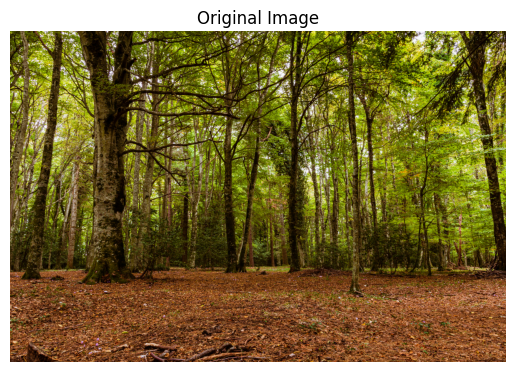

In [4]:
from PIL import Image
from matplotlib import pyplot as plt
original_image = Image.open("./forest.jpg")
plt.title("Original Image")
plt.axis('off')
plt.imshow(original_image)

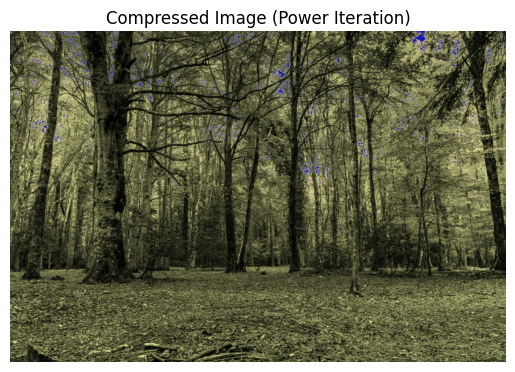

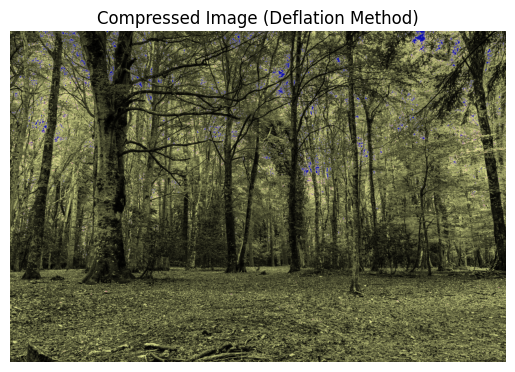

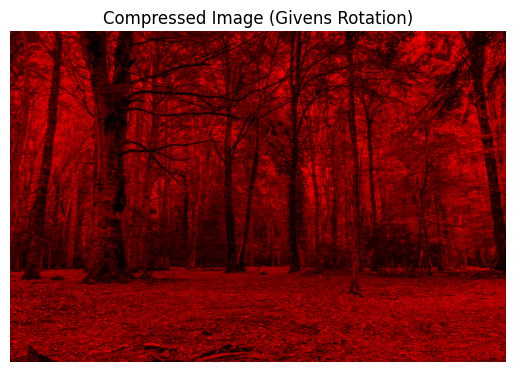

In [5]:
image_array = np.array(original_image)

# Flatten the image into a 2D array
pixels = image_array.reshape((-1, 3))
num_pixels = pixels.shape[0]

# Compute the covariance matrix of the image pixels
covariance_matrix = np.cov(pixels.T)

# Apply power iteration method to find the dominant eigenvalue and eigenvector
power_eigenvalue, power_eigenvector = power_iteration(covariance_matrix)

# Apply deflation method to find the second dominant eigenvalue and eigenvector
deflation_eigenvalues, deflation_eigenvectors = deflation_method(covariance_matrix, 1)

# Apply Givens rotation method to find the third dominant eigenvalue and eigenvector
givens_eigenvalues, givens_eigenvectors = givens_rotation(covariance_matrix)

# Reconstruct the compressed image using the dominant eigenvector from each method
power_compressed_pixels = np.dot(pixels, power_eigenvector)[:, np.newaxis] * power_eigenvector.reshape(1, -1)
deflation_compressed_pixels = np.dot(pixels, deflation_eigenvectors[:, 0])[:, np.newaxis] * deflation_eigenvectors[:, 0].reshape(1, -1)
givens_compressed_pixels = np.dot(pixels, givens_eigenvectors[:, 0])[:, np.newaxis] * givens_eigenvectors[:, 0].reshape(1, -1)

power_compressed_image = power_compressed_pixels.reshape(image_array.shape).astype(np.uint8)
deflation_compressed_image = deflation_compressed_pixels.reshape(image_array.shape).astype(np.uint8)
givens_compressed_image = givens_compressed_pixels.reshape(image_array.shape).astype(np.uint8)

compressed_image_puissance = Image.fromarray(power_compressed_image)
compressed_image_puissance.save("compressed_image_puissance.jpg")
compressed_image_deflation = Image.fromarray(deflation_compressed_image)
compressed_image_deflation.save("compressed_image_deflation.jpg")
compressed_image_givens = Image.fromarray(givens_compressed_image)
compressed_image_givens.save("compressed_image_givens.jpg")
# Display the compressed images
plt.imshow(power_compressed_image)
plt.title("Compressed Image (Power Iteration)")
plt.axis('off')
plt.show()

plt.imshow(deflation_compressed_image)
plt.title("Compressed Image (Deflation Method)")
plt.axis('off')
plt.show()

plt.imshow(givens_compressed_image)
plt.title("Compressed Image (Givens Rotation)")
plt.axis('off')
plt.show()

### Error  Calculation

In [6]:
import numpy as np
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio

# Calculate Mean Squared Error (MSE)
mse_power = mean_squared_error(image_array, power_compressed_image)
mse_deflation = mean_squared_error(image_array, deflation_compressed_image)
mse_givens = mean_squared_error(image_array, givens_compressed_image)

print("Mean Squared Error (MSE)")
print("Power Iteration:", mse_power)
print("Deflation Method:", mse_deflation)
print("Givens Rotation:", mse_givens)

# Calculate Peak Signal-to-Noise Ratio (PSNR)
psnr_power = peak_signal_noise_ratio(image_array, power_compressed_image)
psnr_deflation = peak_signal_noise_ratio(image_array, deflation_compressed_image)
psnr_givens = peak_signal_noise_ratio(image_array, givens_compressed_image)

print("\nPeak Signal-to-Noise Ratio (PSNR)")
print("Power Iteration:", psnr_power)
print("Deflation Method:", psnr_deflation)
print("Givens Rotation:", psnr_givens)


Mean Squared Error (MSE)
Power Iteration: 1266.46402375
Deflation Method: 1266.4639102916667
Givens Rotation: 4836.384700861111

Peak Signal-to-Noise Ratio (PSNR)
Power Iteration: 17.10487503503105
Deflation Method: 17.104875424101166
Givens Rotation: 11.28559522191124
